In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import Image


(2436, 2623, 4)


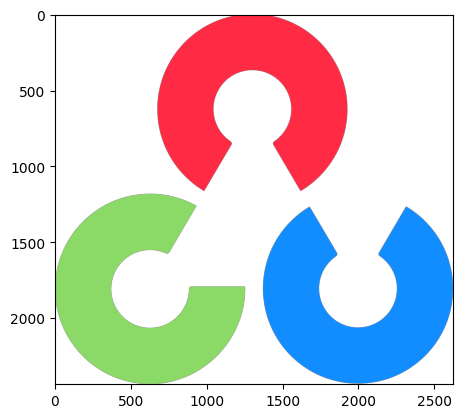

In [25]:
image = '../data/opencv_logo.png'

img = cv2.imread(image,-1)
print(img.shape)
b,g,r,a = cv2.split(img)
plt.imshow(img[:,:,[2,1,0,3]]);


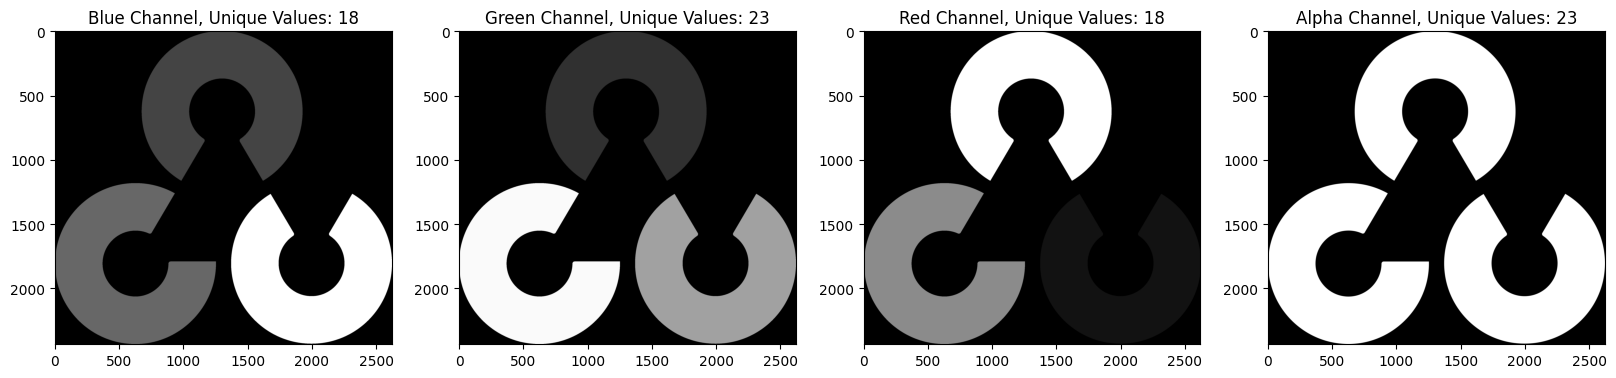

In [26]:
# split the image into its channels
b,g,r,a = cv2.split(img)

fig, ax = plt.subplots(1,4, figsize=(20,10))
ax[0].imshow(b, cmap='gray');   ax[0].set_title(f"Blue Channel, Unique Values: {len(np.unique(b))}");
ax[1].imshow(g, cmap='gray');   ax[1].set_title(f"Green Channel, Unique Values: {len(np.unique(g))}");
ax[2].imshow(r, cmap='gray');   ax[2].set_title(f"Red Channel, Unique Values: {len(np.unique(r))}");
ax[3].imshow(a, cmap='gray');   ax[3].set_title(f"Alpha Channel, Unique Values: {len(np.unique(a))}");



## Create PNG transparent file from JPG

The Kangaroo image appears to be transparent, but it's back ground is white as demonstrated by the green square. The objective is to remove the white background make it transparent. 

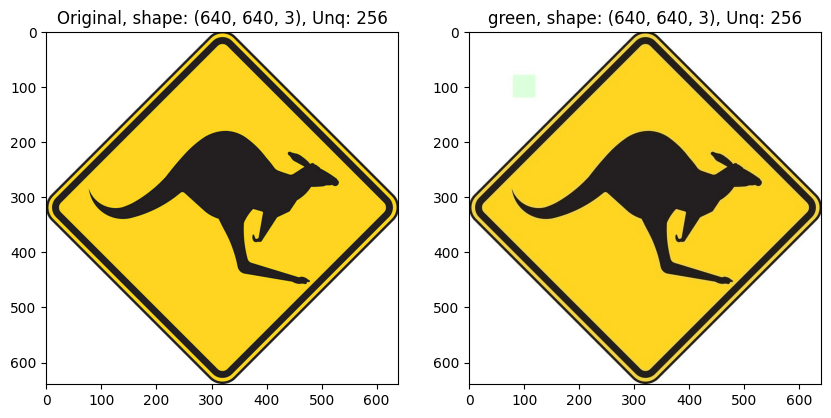

In [27]:
img_kang_org =  cv2.imread('../data/kangaroo.jpg')
img_kang = cv2.imread('../data/kangaroo_sign_with_green_marker.jpg')

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_kang_org[:,:,::-1]);   ax[0].set_title(f"Original, shape: {img_kang_org.shape}, Unq: {len(np.unique(img_kang_org))}");
ax[1].imshow(img_kang[:,:,::-1]);   ax[1].set_title(f"green, shape: {img_kang.shape}, Unq: {len(np.unique(img_kang))}");



**Create Binary mask**

The following steps will create the part to keep in the photo, which is the yellow square. Of the two thresholded images one is thresholded at 0,255 and the other one will be semi-transparent with "white" values at 200 vs 255, which is not noticiable in matplot lib. 

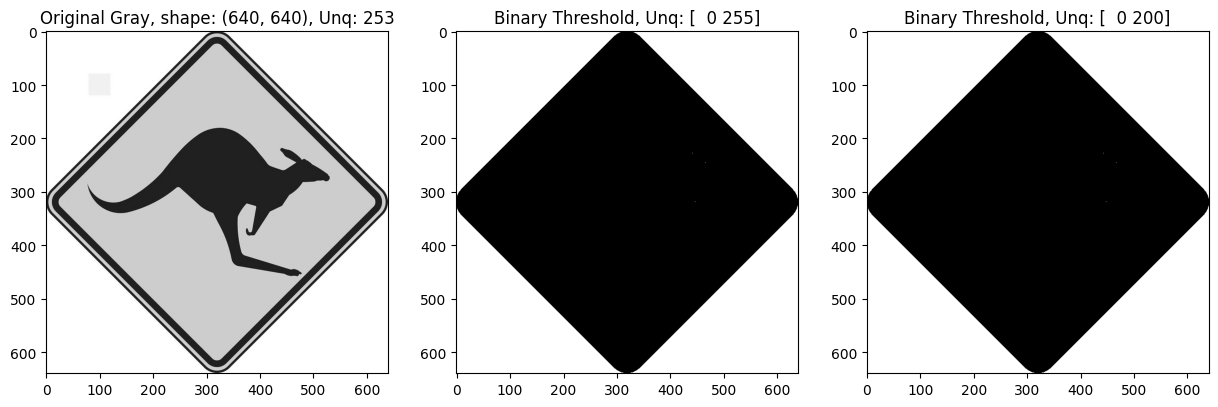

In [28]:
# Convert to Grayscale for thresholding (needs to be one channel)
img = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

# Binary Threshold (two examples)
_, img_bin = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)
_, img_semi_bin = cv2.threshold(img, 230, 200, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img, cmap='gray');   ax[0].set_title(f"Original Gray, shape: {img.shape}, Unq: {len(np.unique(img))}");
ax[1].imshow(img_bin, cmap='gray');   ax[1].set_title(f"Binary Threshold, Unq: {np.unique(img_bin)}");
ax[2].imshow(img_semi_bin, cmap='gray');   ax[2].set_title(f"Binary Threshold, Unq: {np.unique(img_semi_bin)}");



**The inverse images look identical, but the black on the left is 0 whereas the "black" on the right is 55.  This creates a semi trasparent mask.  Notic how the NOT operation was basically a modulo of 255 operation. 

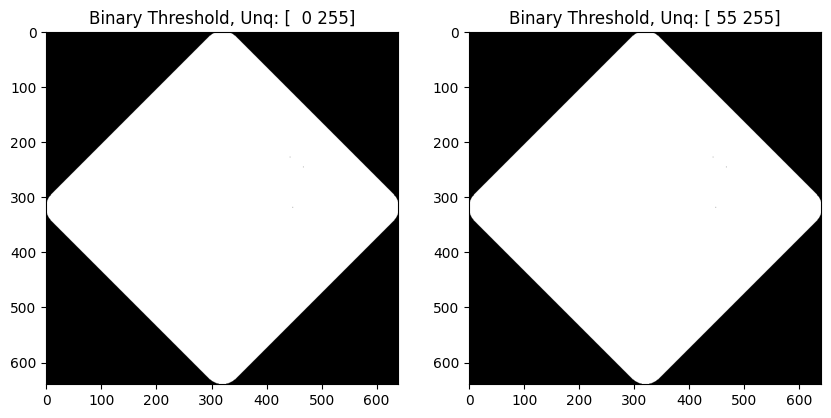

In [29]:
# Inverse the thresholded image so the square is white (255)
img_bin_inv = cv2.bitwise_not(img_bin)
img_semi_bin_inv = cv2.bitwise_not(img_semi_bin)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_bin_inv, cmap='gray');   ax[0].set_title(f"Binary Threshold, Unq: {np.unique(img_bin_inv)}");
ax[1].imshow(img_semi_bin_inv, cmap='gray');   ax[1].set_title(f"Binary Threshold, Unq: {np.unique(img_semi_bin_inv)}");

**Looking back at the openCV logo with the four channels, the alpha channel now resembles what we have here above. Now we can add this mask as a fourth channel to the Kangaroo picture, which will be the alpha channel. 

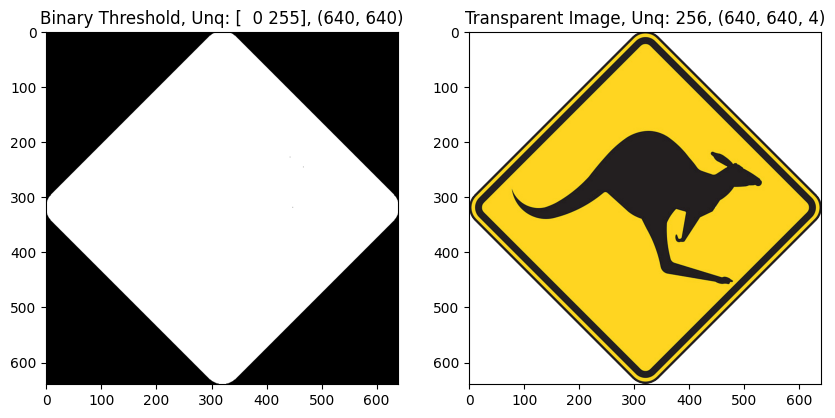

In [30]:
# Split the original image into its channels
b,g,r = cv2.split(cv2.imread('../data/kangaroo.jpg'))
# Assign thresholded image to alpha channel of original image
a = img_bin_inv

# Merge channels back together
img_transparent = cv2.merge([b,g,r,a])

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_bin_inv, cmap='gray');   ax[0].set_title(f"Binary Threshold, Unq: {np.unique(img_bin_inv)}, {img_bin_inv.shape}");
ax[1].imshow(img_transparent[:,:,[2,1,0,3]]);   ax[1].set_title(f"Transparent Image, Unq: {len(np.unique(img_transparent))}, {img_transparent.shape}");



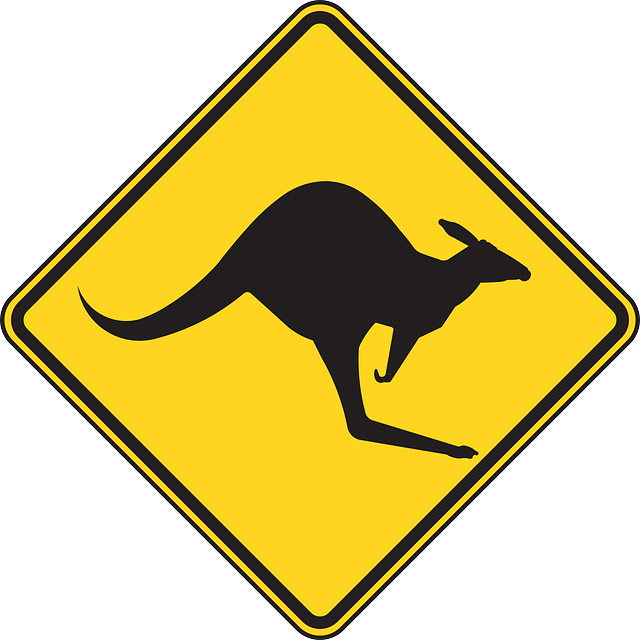

In [32]:
# Save the full transparent image, alpha full bcs there's no transparency when overlaid on another image
cv2.imwrite('../data/kangaroo_alpha_full.png', img_transparent)
Image('../data/kangaroo_alpha_full.png', width=200)

Repeat the process to create a semi-transparent image

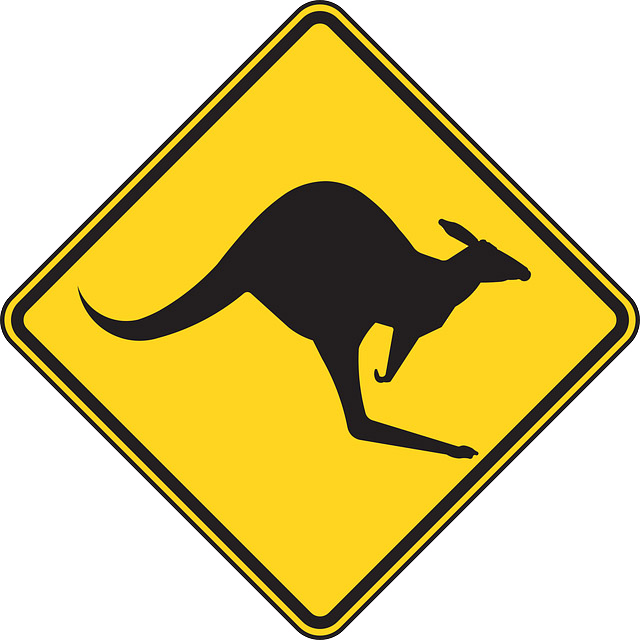

In [34]:
# reassign 'a' to the transparent and use the previous b,g,r to merge into new file
a = img_semi_bin_inv
img_semi_transparent = cv2.merge([b,g,r,a])

# Save imgage
cv2.imwrite('../data/kangaroo_alpha_semi.png', img_semi_transparent)

# Display image
Image('../data/kangaroo_alpha_semi.png', width=200)

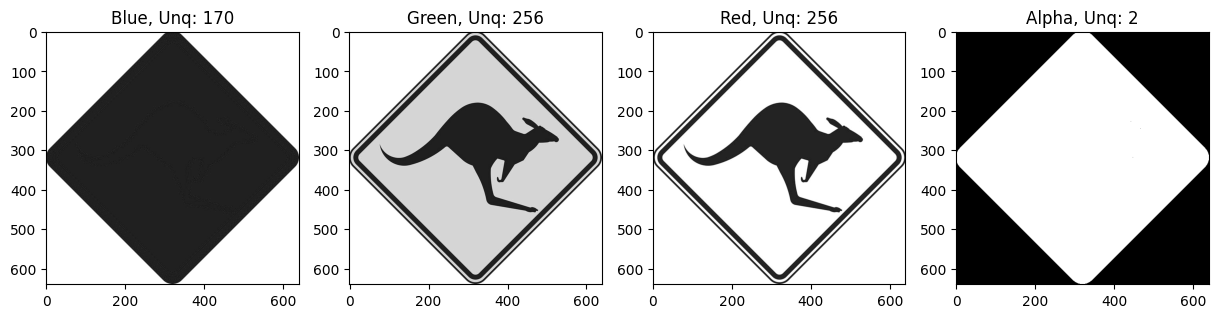

In [42]:
# inspect the image
img = cv2.imread('../data/kangaroo_alpha_full.png', -1)

fig, ax = plt.subplots(1,4, figsize=(15,10))
ax[0].imshow(img[:,:,[0]],cmap='gray');   ax[0].set_title(f"Blue, Unq: {len(np.unique(img[:,:,[0]]))}");
ax[1].imshow(img[:,:,[1]],cmap='gray');   ax[1].set_title(f"Green, Unq: {len(np.unique(img[:,:,[1]]))}");
ax[2].imshow(img[:,:,[2]],cmap='gray');   ax[2].set_title(f"Red, Unq: {len(np.unique(img[:,:,[2]]))}");
ax[3].imshow(img[:,:,[3]],cmap='gray');   ax[3].set_title(f"Alpha, Unq: {len(np.unique(img[:,:,[3]]))}");
